In [74]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import heapq


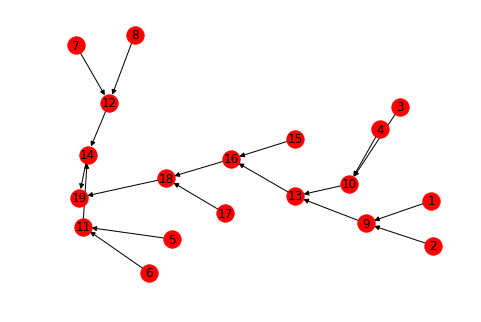

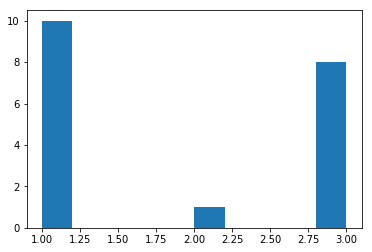

In [127]:
D = nx.DiGraph(name="river_network")
pos = nx.spring_layout(D)
pos = {
 '1': (75, 10),
 '2': (80, 13),
 '3': (85, 20),
 '4': (95, 23),
 '5': (86, 51),
 '6': (89, 58),
 '7': (91, 75),
 '8': (85, 81),
 '9': (71, 18),
 '10': (74, 24),
 '11': (71, 55),
 '12': (66, 62),
 '13': (60, 30),
 '14': (58, 51),
 '15': (50, 22),
 '16': (40, 45),
 '17': (35, 30),
 '18': (25, 55),
 '19': (15, 60),
}

D.add_nodes_from(range(1, 20))
D.add_edges_from(
    [
        (1, 9),
        (2, 9),
        (3, 10),
        (4, 10),
        (9, 13),
        (10, 13),
        (13, 16),
        (15, 16),
        (16, 18),
        (17, 18),
        (5, 11),
        (6, 11),
        (7, 12),
        (8, 12),
        (11, 14),
        (12, 14),
        (14, 19),
        (18, 19),
    ]
)
labels = {
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "10",
    11: "11",
    12: "12",
    13: "13",
    14: "14",
    15: "15",
    16: "16",
    17: "17",
    18: "18",
    19: "19",
}

nx.draw_spring(D, with_labels=labels, color='blue')
plt.show()


def plot_degree_dist(graph):
    degrees = [graph.degree(n) for n in graph.nodes()]
    plt.hist(degrees)
    plt.show()


plot_degree_dist(D)


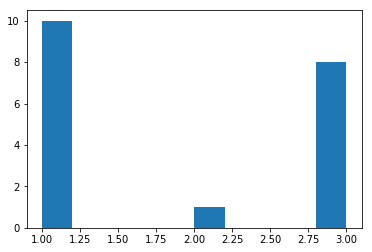

In [2]:

plot_degree_dist(D)

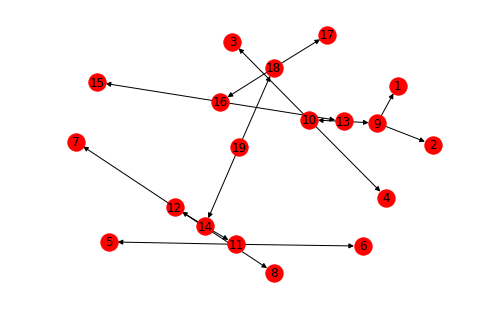

In [88]:

nx.draw_spring(D, with_labels=labels, color='blue')

In [132]:
D = D.reverse()

In [16]:
nx.is_directed_acyclic_graph(D)

True

In [17]:
a = nx.topological_sort(D)

In [18]:
b = nx.dag_to_branching(D)

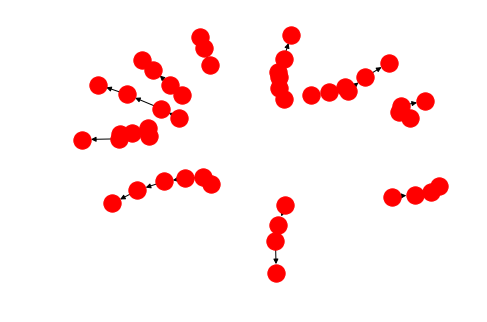

In [19]:
nx.draw(b)

In [104]:
S = nx.all_pairs_lowest_common_ancestor(D)

In [34]:
nx.descendants(D,14)

{19}

In [160]:
#Input should be a directed acyclic graph 
# with breadth-first node numbering

def calc_Rb(D):
    
    if nx.is_directed_acyclic_graph(D) == False:
        return print('Input should be a directed acyclic graph sukkel')

    order_array = np.zeros(nx.number_of_nodes(D))

    for i in range(nx.number_of_nodes(D)):
        if len(nx.descendants(D,i+1)) == 0 or len(nx.descendants(D,i+1)) == 1:
            order_array[i] = 1
        else:
            des_list = list(D.successors(i+1))
            max_orders = heapq.nlargest(2, order_array[[i - 1 for i in des_list]])

            if max_orders[0] == max_orders[1]:
                order_array[i] = max_orders[0] + 1
            else:
                order_array[i] = max_orders[0]

    R_i = int(max(order_array) - 1)
    R_b = np.zeros(R_i)

    for i in range(R_i):
        R_b[i] = sum(order_array == i+1)/sum(order_array == i+2)
        
        
    return R_b, order_array





In [179]:
calc_Rb(D)[1]

array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 1., 3., 1.,
       3., 4.])

In [166]:
a = np.random.choice([0, 1], size=(10,10), p=[4/5, 1/5])
graph_2 = nx.to_networkx_graph(a)

In [167]:
calc_Rb(graph_2)

Input should be a directed acyclic graph sukkel


In [172]:
def longest_path(D):
    len_lp = len(nx.dag_longest_path(D))
    # calculate length of this longest path in cells instead of nodes
    # lem_lp = ... 
    
    return len_lp
    
    

# 😉😘

In [219]:
N_ij = np.zeros((4,4))

order_arr = calc_Rb(D)[1]
for i in range(19):
    childs = list(D.successors(i+1))
    for j in childs:
        N_ij[int(order_arr[j]-1),int(order_arr[i]-1)] += 1
    
N_j = [sum(order_array == i+1) for i in range(4)]


T_ij = N_ij/N_j

In [218]:
T_ij

array([[0.  , 1.75, 0.25, 1.  ],
       [0.  , 0.25, 0.75, 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ]])

In [216]:
T_ij

array([[0., 7., 1., 1.],
       [0., 1., 3., 0.],
       [0., 0., 4., 0.],
       [0., 0., 0., 1.]])

In [222]:
test = {1: [(0, 100), (1, 100), (2, 99), (3, 99), (4, 99), (5, 98), (6, 99), (7, 100), (8, 101), (9, 100), (10, 99), (11, 99), (12, 100), (13, 100), (14, 101), (15, 102), (16, 103), (17, 104), (18, 104), (19, 103), (20, 103), (21, 104), (22, 105), (23, 105), (24, 105), (25, 104), (26, 103), (27, 104), (28, 105), (29, 105), (30, 104), (31, 103), (32, 102), (32, 101)], 2: [(33, 102)], 3: [(33, 101)], 4: [(34, 101), (35, 102), (36, 102), (37, 103), (38, 103), (39, 104), (40, 104), (41, 104), (42, 105), (43, 104), (44, 103), (45, 102), (46, 101), (47, 101), (48, 100), (49, 101), (50, 101), (51, 101), (52, 102), (53, 101), (54, 100), (55, 100), (56, 100), (57, 99), (58, 99), (59, 98), (60, 98), (61, 98), (62, 98), (63, 98), (64, 98), (65, 99), (66, 100), (67, 100), (68, 100), (69, 101), (70, 100), (71, 101), (72, 100), (73, 101), (74, 101), (75, 100), (76, 101), (77, 101), (78, 102), (79, 103), (80, 102), (81, 101), (82, 101), (83, 101), (84, 100), (85, 100), (86, 101), (87, 102), (88, 103), (89, 104), (90, 105), (91, 106), (92, 105), (93, 106), (94, 105), (95, 106), (96, 105), (97, 106), (98, 105), (99, 104), (100, 105), (101, 104), (102, 104), (103, 105), (104, 105), (105, 106), (106, 106), (107, 106), (108, 105), (109, 106), (110, 105), (111, 104), (112, 105), (113, 105), (114, 104), (115, 105), (116, 105), (117, 106), (118, 107), (119, 108), (120, 109), (121, 110), (122, 111), (123, 112), (124, 113), (125, 113), (126, 114), (127, 114), (128, 115), (129, 116), (130, 117), (131, 116), (132, 115), (133, 116), (134, 115)], 5: [(135, 115)], 6: [(135, 116)], 7: [(136, 115), (137, 116), (138, 116), (139, 115), (140, 114), (141, 113), (142, 112), (143, 113), (144, 113), (145, 112), (146, 112), (147, 113), (148, 112), (149, 111), (150, 112), (151, 111), (152, 112), (153, 112), (154, 113), (155, 113), (156, 113), (157, 114), (158, 115), (159, 114), (160, 113), (161, 114), (162, 115), (163, 114), (164, 114), (165, 114), (166, 113), (167, 114), (168, 113), (169, 114), (170, 115), (171, 116), (172, 115), (173, 115), (174, 116), (175, 117), (176, 118), (177, 119), (178, 119), (179, 118), (180, 117), (181, 117), (182, 116), (183, 117), (184, 118), (185, 119), (186, 120), (187, 121), (188, 122), (189, 123), (190, 124), (191, 123), (192, 123), (193, 122), (194, 122), (195, 123), (196, 124), (197, 124), (198, 125)]}

In [227]:
test[1]

[(0, 100),
 (1, 100),
 (2, 99),
 (3, 99),
 (4, 99),
 (5, 98),
 (6, 99),
 (7, 100),
 (8, 101),
 (9, 100),
 (10, 99),
 (11, 99),
 (12, 100),
 (13, 100),
 (14, 101),
 (15, 102),
 (16, 103),
 (17, 104),
 (18, 104),
 (19, 103),
 (20, 103),
 (21, 104),
 (22, 105),
 (23, 105),
 (24, 105),
 (25, 104),
 (26, 103),
 (27, 104),
 (28, 105),
 (29, 105),
 (30, 104),
 (31, 103),
 (32, 102),
 (32, 101)]

In [225]:
Graph = nx.to_networkx_graph(test)

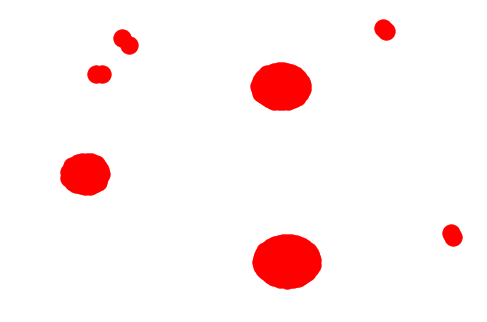

In [226]:
nx.draw(Graph)